# Predicting GPA
Author: Olivia Rueschhoff

This project was conducted with the purpose of using python and linear algebra to demonstrait my skills. 
An anonymous survey was conducted at Western Illinois University asking students information in hopes to build a matrix that can predict students GPA based off several variables including average time spent sleeping, average time spent studying, average time spent socializing, average time spent on their phone, and a satisfaction rating of the university. These variables were added and removed to explore prediciton ability. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
GPA = np.array(pd.read_excel("C:/Users/ruesc/Documents/Math 391 Survey Data.xlsx", usecols='F'))

In [4]:
sleep = np.array(pd.read_excel("C:/Users/ruesc/Documents/Math 391 Survey Data.xlsx", usecols='A'))

In [7]:
study = np.array(pd.read_excel("C:/Users/ruesc/Documents/Math 391 Survey Data.xlsx", usecols='B'))

In [9]:
social = np.array(pd.read_excel("C:/Users/ruesc/Documents/Math 391 Survey Data.xlsx", usecols='C'))

In [11]:
phone = np.array(pd.read_excel("C:/Users/ruesc/Documents/Math 391 Survey Data.xlsx", usecols='D'))

In [13]:
satis = np.array(pd.read_excel("C:/Users/ruesc/Documents/Math 391 Survey Data.xlsx", usecols='E'))

In [15]:
X = np.array([sleep, study, social, phone, satis])
X.reshape(-1,5)

array([[ 8. ,  8. ,  8. ,  8. ,  7. ],
       [ 8. ,  8.5,  8. ,  7. ,  7. ],
       [ 8. ,  7. ,  6. ,  8. ,  6.5],
       [ 6.5,  5. ,  7. ,  8. ,  9.5],
       [ 7.5,  7. ,  7. ,  7. ,  6. ],
       [ 7. ,  7. ,  6. ,  9. ,  7.5],
       [ 6.5,  7. ,  6. ,  9. ,  6. ],
       [ 4. ,  7.5,  5. ,  6. ,  6.5],
       [ 7.5,  2.5,  7. ,  4. ,  6.5],
       [ 8. ,  4. ,  4. ,  7.5,  2.5],
       [ 4. ,  2. ,  4. ,  4. ,  3. ],
       [ 2. ,  3.5,  3. ,  6. ,  3. ],
       [ 5. ,  3. ,  2.5,  3.5,  4. ],
       [ 1.5,  4. ,  3.5,  2.5,  2. ],
       [ 3. ,  2. ,  5. ,  5. ,  4. ],
       [ 2. ,  3. ,  1.5,  3. ,  2. ],
       [ 4. ,  2. ,  3. ,  9.5,  6. ],
       [ 2. ,  5. ,  2.5,  5. ,  3.5],
       [ 4.5,  7. ,  5. ,  4.5,  2. ],
       [11. ,  5.5,  1.5,  3. ,  4. ],
       [ 1. ,  1. ,  2. ,  3. ,  3. ],
       [ 6. ,  3. ,  3. ,  3. ,  1. ],
       [ 2. ,  5. ,  6. ,  3. ,  4. ],
       [ 5. ,  4. ,  3.5,  4. ,  5. ],
       [ 2. ,  3. ,  2. ,  2. ,  2. ],
       [ 4. ,  3.5,  1. ,

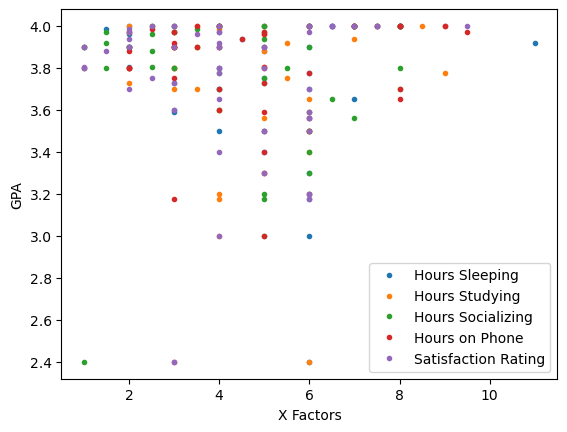

In [17]:
#Plot all Variables Versus GPA
X = X.reshape(49,-1)
plt.plot(X, GPA, ".")
plt.xlabel("X Factors")
plt.ylabel("GPA")
plt.legend(["Hours Sleeping", "Hours Studying", "Hours Socializing", "Hours on Phone", "Satisfaction Rating"]);

In [19]:
#solve for the coefficients
#Using formula (X_T X)-1 X_T Y
beta = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),GPA)
beta

array([[0.08436857],
       [0.18868691],
       [0.1942395 ],
       [0.19828581],
       [0.06177459]])

In [21]:
labels = ["Hours Sleeping", "Hours Studying", "Hours Socializing", "Hours on Phone", "Satisfaction Rating"]
data = pd.DataFrame(X, columns = labels)

In [23]:
import statsmodels.api as sm

In [25]:
list = ["GPA"]
gpa_df = pd.DataFrame(GPA, columns= list)

In [27]:
#Create and fit model (explicitly adding intercept)
data = sm.add_constant(data)
model = sm.OLS(gpa_df, data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.6164
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.688
Time:                        12:24:28   Log-Likelihood:                -11.127
No. Observations:                  49   AIC:                             34.25
Df Residuals:                      43   BIC:                             45.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.7466    

In [29]:
predicted = np.array([3.7466 -0.022*sleep[i]-0.0148*study[i]+0.0009*social[i]+0.0483*phone[i]-0.012*satis[i] for i in range(49)])

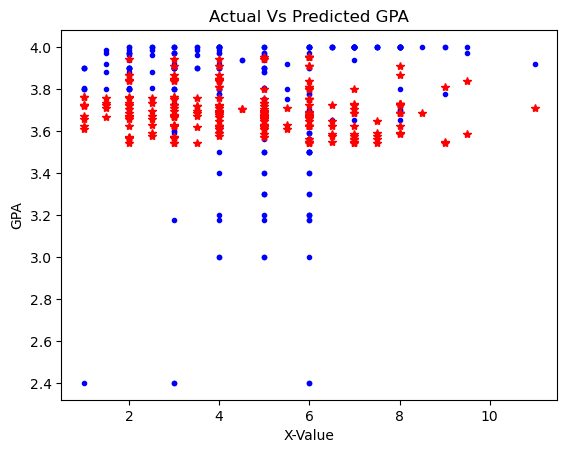

In [31]:
plt.plot(X,GPA, "b.", label="Actual GPA")
plt.plot(X, predicted, "r*", label = "Predicted Values")
plt.xlabel("X-Value")
plt.ylabel("GPA")
plt.title("Actual Vs Predicted GPA");

In [33]:
residual = (GPA-predicted)

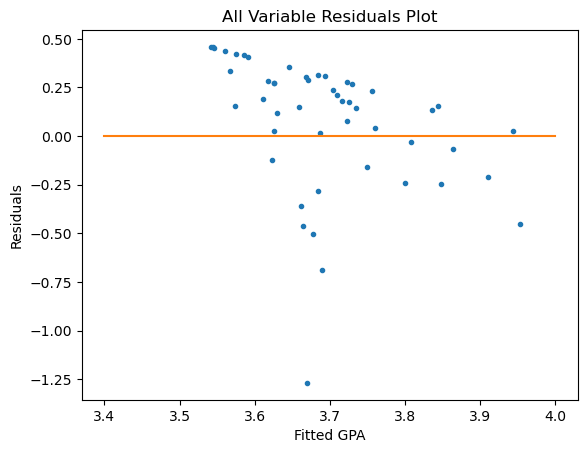

In [35]:
plt.plot(predicted, residual, ".")
plt.plot([3.4, 4], [0, 0])
plt.xlabel("Fitted GPA")
plt.ylabel("Residuals")
plt.title("All Variable Residuals Plot");

## Removing Phone Variable

In [37]:
X = np.array([sleep, study, social, satis]).reshape(49,-1)
labels = ["Hours Sleeping", "Hours Studying", "Hours Socializing", "Satisfaction Rating"]
data2 = pd.DataFrame(X, columns = labels)

In [39]:
data2 = sm.add_constant(data2)
model2 = sm.OLS(gpa_df, data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.3481
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.844
Time:                        12:24:37   Log-Likelihood:                -12.060
No. Observations:                  49   AIC:                             34.12
Df Residuals:                      44   BIC:                             43.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.6577    

In [41]:
predicted = np.array([3.6577 -0.0099*sleep[i]+0.00541*study[i]+0.0321*social[i]-0.0031*satis[i] for i in range(49)])

In [43]:
residual = (GPA-predicted)

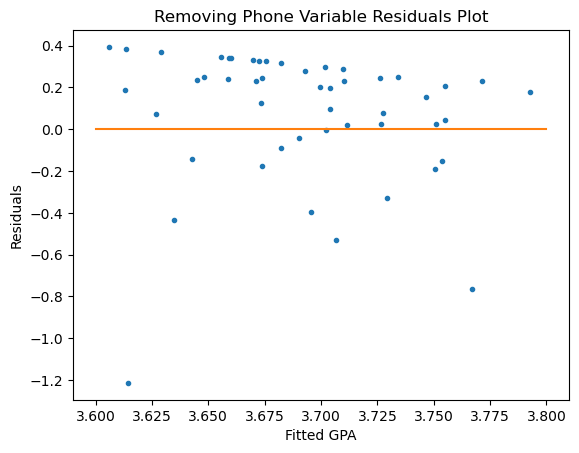

In [45]:
plt.plot(predicted, residual, ".")
plt.plot([3.6, 3.8], [0, 0])
plt.xlabel("Fitted GPA")
plt.ylabel("Residuals")
plt.title("Removing Phone Variable Residuals Plot");

## Removing Socialization

In [47]:
X = np.array([sleep, study, phone, satis]).reshape(49,-1)
labels = ["Hours Sleeping", "Hours Studying", "Hours on Phone", "Satisfaction Rating"]
data3 = pd.DataFrame(X, columns = labels)

In [49]:
data3 = sm.add_constant(data3)
model3 = sm.OLS(gpa_df, data3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.4225
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.792
Time:                        12:24:44   Log-Likelihood:                -11.899
No. Observations:                  49   AIC:                             33.80
Df Residuals:                      44   BIC:                             43.26
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.5990    

## Removing Sleep

In [51]:
X = np.array([study, social, phone, satis]).reshape(49,-1)
labels = ["Hours Studying", "Hours Socializing", "Hours on Phone", "Satisfaction Rating"]
data4 = pd.DataFrame(X, columns = labels)

In [53]:
data4 = sm.add_constant(data4)
model4 = sm.OLS(gpa_df, data4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.348
Date:                Fri, 15 Nov 2024   Prob (F-statistic):             0.0177
Time:                        12:24:47   Log-Likelihood:                -6.3121
No. Observations:                  49   AIC:                             22.62
Df Residuals:                      44   BIC:                             32.08
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1917    

In [55]:
predicted = np.array([4.1917-0.0726*study[i]-0.0193*social[i]+0.0164*phone[i]-0.0297*satis[i] for i in range(49)])

In [57]:
residuals = (GPA-predicted)

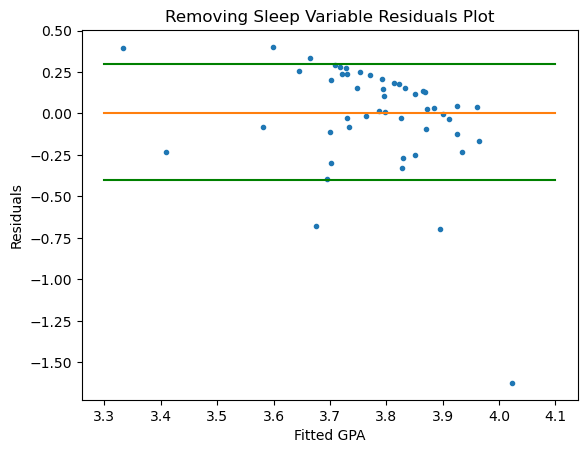

In [59]:
plt.plot(predicted, residuals, ".")
plt.plot([3.3, 4.1], [0, 0])
plt.plot([3.3, 4.1], [0.3, 0.3], 'g')
plt.plot([3.3, 4.1], [-.4, -.4], 'g')
plt.xlabel("Fitted GPA")
plt.ylabel("Residuals")
plt.title("Removing Sleep Variable Residuals Plot");

## Remove Studying

In [61]:
X = np.array([sleep, social, phone, satis]).reshape(49,-1)
labels = ["Hours Sleeping", "Hours Socializing", "Hours on Phone", "Satisfaction Rating"]
data5 = pd.DataFrame(X, columns = labels)

In [63]:
data5 = sm.add_constant(data5)
model5 = sm.OLS(gpa_df, data5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.6470
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.632
Time:                        12:24:54   Log-Likelihood:                -11.423
No. Observations:                  49   AIC:                             32.85
Df Residuals:                      44   BIC:                             42.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.7053    

## Removing Satisfaction

In [65]:
X = np.array([sleep, study, social, phone]).reshape(49,-1)
labels = ["Hours Sleeping", "Hours Studying", "Hours Socializing", "Hours on Phone"]
data6 = pd.DataFrame(X, columns = labels)

In [67]:
data6 = sm.add_constant(data6)
model6 = sm.OLS(gpa_df, data6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8408
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.507
Time:                        12:24:57   Log-Likelihood:                -11.018
No. Observations:                  49   AIC:                             32.04
Df Residuals:                      44   BIC:                             41.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.5831      0.13

In [69]:
predicted = np.array([3.5831+0.0388*sleep[i]-0.0134*study[i]+0.005*social[i]-0.0091*phone[i] for i in range(49)])

In [71]:
residuals = (GPA-predicted)

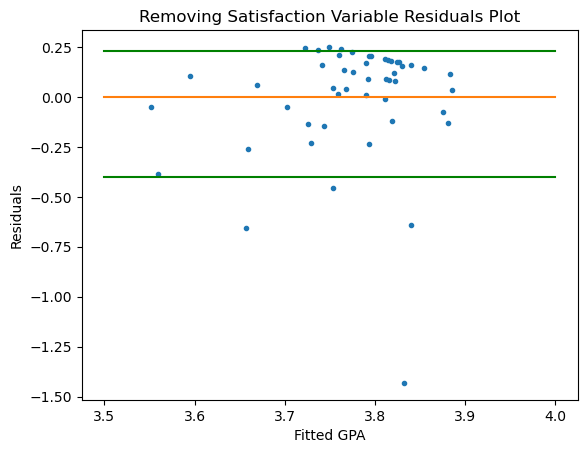

In [73]:
plt.plot(predicted, residuals, ".")
plt.plot([3.5, 4], [0, 0])
plt.plot([3.5, 4], [0.23, 0.23], 'g')
plt.plot([3.5, 4], [-.4, -.4], 'g')
plt.xlabel("Fitted GPA")
plt.ylabel("Residuals")
plt.title("Removing Satisfaction Variable Residuals Plot");

## Removing Satisfaction and Sleep Variables

In [75]:
X = np.array([study, social, phone]).reshape(49,-1)
labels = ["Hours Studying", "Hours Socializing", "Hours on Phone"]
data7 = pd.DataFrame(X, columns = labels)

In [77]:
data7 = sm.add_constant(data7)
model7 = sm.OLS(gpa_df, data7).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.265
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.298
Time:                        12:25:05   Log-Likelihood:                -10.839
No. Observations:                  49   AIC:                             29.68
Df Residuals:                      45   BIC:                             37.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9687      0.15

In [79]:
predicted = np.array([3.9687-0.0332*study[i]+0.0242*social[i]-0.0043*phone[i] for i in range(49)])
residuals = (GPA-predicted)

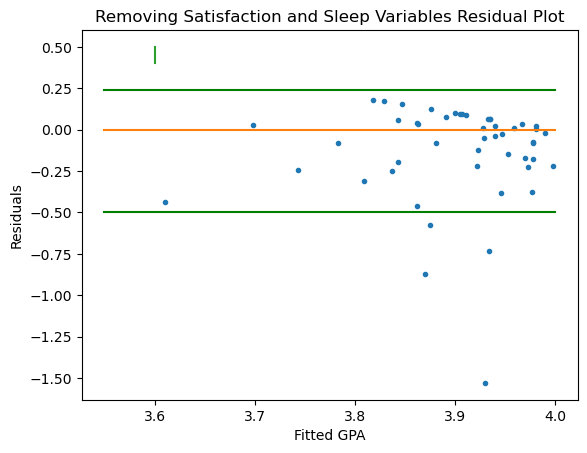

In [81]:
plt.plot(predicted, residuals, ".")
plt.plot([3.55, 4], [0, 0])
plt.plot([3.6,3.6],[.4,0.5])
plt.plot([3.55, 4], [0.24, 0.24], 'g')
plt.plot([3.55, 4], [-.5, -.5], 'g')
plt.xlabel("Fitted GPA")
plt.ylabel("Residuals")
plt.title("Removing Satisfaction and Sleep Variables Residual Plot");

# More Exploration

## Predicting Satisfaction from GPA and Socialization

In [83]:
X = np.array([social, GPA]).reshape(49,-1)
labels = [ "Hours Socializing", "GPA"]
data8 = pd.DataFrame(X, columns = labels)
list = ["satis"]
satis_df = pd.DataFrame(satis, columns= list)

In [85]:
data8 = sm.add_constant(data8)
model8 = sm.OLS(satis_df, data8).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  satis   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.087
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.346
Time:                        12:25:14   Log-Likelihood:                -73.341
No. Observations:                  49   AIC:                             152.7
Df Residuals:                      46   BIC:                             158.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7844      0.65

In [87]:
predicted = np.array([4.7844-0.0942*social[i]+0.212*GPA[i] for i in range(49)])
residuals = (satis-predicted)

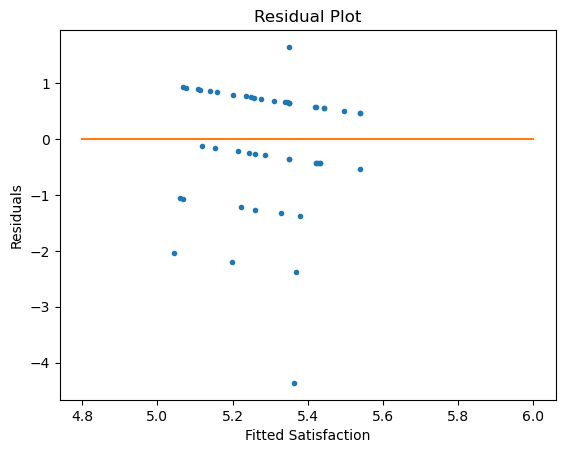

In [89]:
plt.plot(predicted, residuals, ".")
plt.plot([4.8, 6], [0, 0])
plt.xlabel("Fitted Satisfaction")
plt.ylabel("Residuals")
plt.title("Residual Plot");

### Just Socialization to predict Satisfaction

In [91]:
X = np.array([social]).reshape(49,-1)
labels = [ "Hours Socializing"]
data9 = pd.DataFrame(X, columns = labels)

In [93]:
data9 = sm.add_constant(data9)
model9 = sm.OLS(satis_df, data9).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  satis   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9804
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.327
Time:                        12:25:21   Log-Likelihood:                -73.967
No. Observations:                  49   AIC:                             151.9
Df Residuals:                      47   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8682      0.37

In [95]:
predicted = np.array([4.8682+0.1105*social[i] for i in range(49)])
residuals = (satis-predicted)

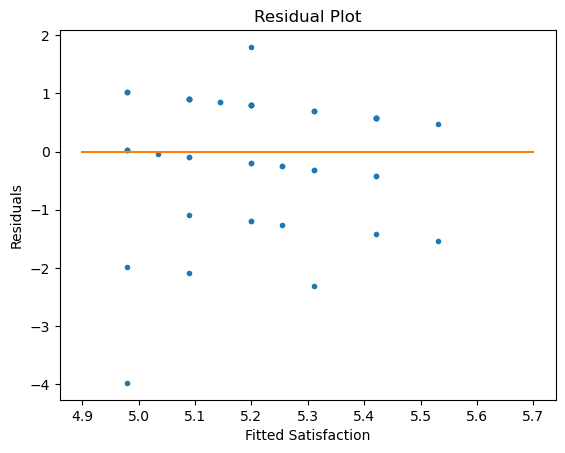

In [97]:
plt.plot(predicted, residuals, ".")
plt.plot([4.9, 5.7], [0, 0])
plt.xlabel("Fitted Satisfaction")
plt.ylabel("Residuals")
plt.title("Residual Plot");

## GPA to predict Socialization

In [99]:
X = np.array([GPA]).reshape(49,-1)
labels = ["GPA"]
data10 = pd.DataFrame(X, columns = labels)
list = ["social"]
social_df = pd.DataFrame(social, columns= list)

In [101]:
data10 = sm.add_constant(data10)
model10 = sm.OLS(social_df, data10).fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                 social   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.913
Date:                Fri, 15 Nov 2024   Prob (F-statistic):             0.0945
Time:                        12:25:26   Log-Likelihood:                -85.634
No. Observations:                  49   AIC:                             175.3
Df Residuals:                      47   BIC:                             179.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1024      2.436     -0.453      0.6

In [103]:
predicted = np.array([-1.1024+1.1002*GPA[i] for i in range(49)])
residuals = (social-predicted)

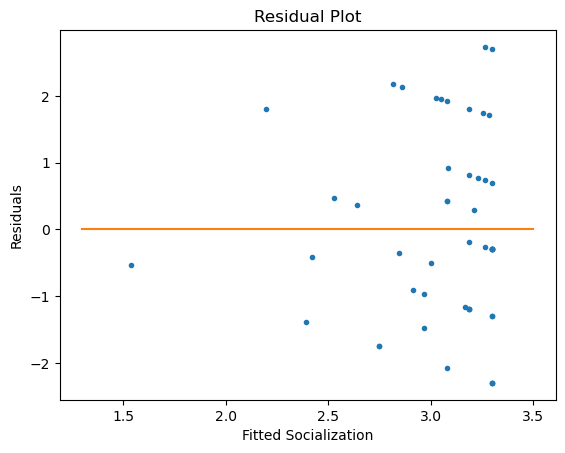

In [105]:
plt.plot(predicted, residuals, ".")
plt.plot([1.3, 3.5], [0, 0])
plt.xlabel("Fitted Socialization")
plt.ylabel("Residuals")
plt.title("Residual Plot");

In [107]:
X = np.array([GPA]).reshape(49,-1)
labels = ["GPA"]
data11 = pd.DataFrame(X, columns = labels)
list = ["satis"]
satis_df = pd.DataFrame(satis, columns= list)

In [109]:
data11 = sm.add_constant(data11)
model11 = sm.OLS(satis_df, data11).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  satis   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     20.93
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.48e-05
Time:                        12:25:52   Log-Likelihood:                -65.448
No. Observations:                  49   AIC:                             134.9
Df Residuals:                      47   BIC:                             138.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1523      1.613     -1.334      0.1

In [111]:
predicted = np.array([-2.1523+1.9534*GPA[i] for i in range(49)])
residuals = (satis-predicted)

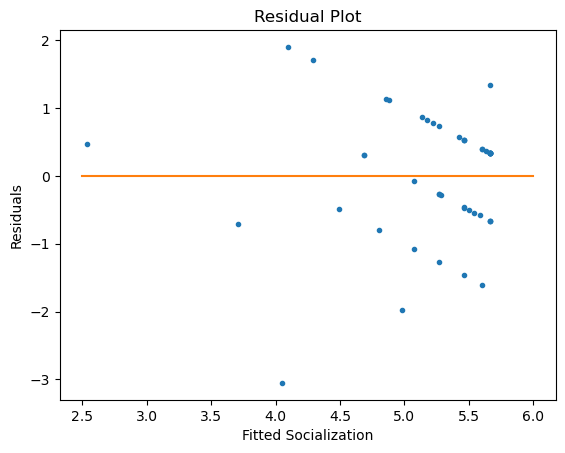

In [113]:
plt.plot(predicted, residuals, ".")
plt.plot([2.5, 6], [0, 0])
plt.xlabel("Fitted Socialization")
plt.ylabel("Residuals")
plt.title("Residual Plot");

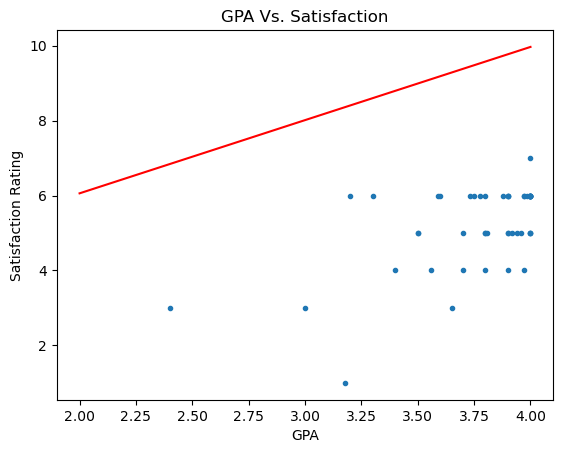

In [115]:
plt.plot(GPA, satis, ".")
plt.plot([2,4],[2.1523+1.9534*2, 2.1523+1.9534*4], "r")
plt.xlabel("GPA")
plt.ylabel("Satisfaction Rating")
plt.title("GPA Vs. Satisfaction");